# Modèle linéaire

Considérons la cas classique d'une fonction affine :

$$y=ax+b$$

Ici, $a$ et $b$ sont des réels. Ces deux nombres définissent entièrement la courbe et permet donc d'obtenir une relation **affine** entre $x$ et $y$. En statistique, cette relation est à la base des modèles dit **linéaires**, où une variable réponse se définit comme une somme de variables explicatives où chacune de ces dernières sont multipliés par un coefficient.


## Modèle linéaire simple

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

Dans le modèle linéaire simple (une seule variable explicative), on suppose que la variable réponse suit le modèle suivant :

$$y_i=\beta_0 + \beta_1 x_i + \varepsilon_i$$

On remarque la ressemblance avec la fonction affine présentée ci-dessus. La différence réside dans l'existence du terme aléatoire (appelé bruit) $\varepsilon_i$. Afin de considérer le modèle, il est nécessaire de se placer sous les hypothèses suivantes

$$(\mathcal{H}) : \left\{\begin{matrix}
\mathbb{E}[\varepsilon_i]=0\\ 
\text{Cov}(\varepsilon_i, \varepsilon_j)=\delta_{ij} \sigma^2
\end{matrix}\right.$$
Les différents éléments qui interviennent sont :

- $\beta_0$ : l'ordonnée à l'origine (nommée *intercept*)
- $\beta_1$ : le coefficient directeur
- $x_i$ : l'observation $i$
- $y_i$ : le $i$-ème prix
- $\varepsilon_i$ : le bruit aléatoire liée à la $i$-ème observation

La solution peut se calculer facilement via les formules fermées suivantes :

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \qquad \hat{\beta}_0 = \hat{y} - \hat{\beta}_1 \bar{x}$$

## Modèle linéaire multiple

Dans le cas multiple (pour $p$ variables explicatives), pour la $i$-ème observation, le modèle s'écrit :

$$y_i= \beta_0 + \sum_{j=1}^p \beta_j x_{ij} + \varepsilon_i$$

Ainsi, une observation $x_i$ n'est plus une valeur, mais un **vecteur** $(x_{i1}, \dots, x_{ip})$. Il est plus commode de regrouper ces prix $y_i$ et ces vecteurs d'observations $x_i$ dans des matrices :

$$Y=X \beta + \varepsilon$$

Sous les hypothèses équivalentes du modèle simple en plus grand dimension

$$(\mathcal{H}) : \left\{\begin{matrix}
\text{rank}(X)=p\\ 
\mathbb{E}[\varepsilon]=0 \text{ et }\text{Var}(\varepsilon)=\sigma^2 I_p
\end{matrix}\right.$$

Les différents éléments qui interviennent sont :

- $\beta$ : le vecteur directeur
- $X$ : la matrice des observations
- $Y$ : le vecteur de prix
- $\varepsilon$ : le vecteur de bruit

Avec $X=( \mathbf{1}, X_1, \dots, X_n)$, $Y=(y_1, \dots, y_n)^\top$ et $\varepsilon=(\varepsilon_1, \dots, \varepsilon_n)^\top$. La solution des MCO (Moindres Carrés Ordinaires) est alors :

$$\hat{\beta}= (X^\top X)^{-1} X^\top Y$$

Vous pouvez d'ailleurs faire la démonstration de votre coté ! Pour plus d'information mathématiques, le portail de wikipédia qui est très bien fait : [lien ici](https://fr.wikipedia.org/wiki/Portail:Probabilit%C3%A9s_et_statistiques)

# Implémenter une régression linéaire 


In [77]:
import os,\
      pandas,\
      subprocess
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/PY4BD/data-analysis/data

def read_from_zip(zip,
                    file_loc,
                    **pdopt):
    cmd  = lambda : subprocess.getoutput(
                       f'unzip -p {zip} {file_loc}'
                       )
    return pandas.read_csv(StringIO(cmd()),**pdopt)



Mounted at /content/drive
/content/drive/MyDrive/PY4BD/data-analysis/data


In [2]:
price_availability = read_from_zip("Datasets.zip","Datasets/price_availability.csv",sep=';')
print(price_availability.shape)
price_availability.head(10)

(4748696, 7)


,listing_id,day,created,available,local_currency,local_price,min_nights
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2
5,20897010,2018-12-09,2018-09-26 15:10:09.000+0000,True,EUR,172,2
6,4290340,2018-09-04,2018-09-27 10:50:42.000+0000,True,EUR,67,15
7,4290340,2018-09-04,2018-09-27 06:06:28.000+0000,True,EUR,67,15
8,4290340,2018-09-04,2018-09-26 19:42:08.000+0000,True,EUR,67,15
9,24574634,2018-09-21,2018-09-27 10:48:47.000+0000,False,EUR,44,5


In [3]:
price_availability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748696 entries, 0 to 4748695
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   day             object
 2   created         object
 3   available       bool  
 4   local_currency  object
 5   local_price     int64 
 6   min_nights      int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 221.9+ MB


In [4]:
listings = read_from_zip("Datasets.zip","Datasets/listings_final.csv",sep=';',index_col=0)
print(listings.shape)
listings.head()

(1000, 18)


,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


In [17]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   listing_id                1000 non-null   int64  
 1   name                      1000 non-null   object 
 2   type                      1000 non-null   object 
 3   city                      1000 non-null   object 
 4   neighborhood              935 non-null    object 
 5   latitude                  1000 non-null   float64
 6   longitude                 1000 non-null   float64
 7   person_capacity           1000 non-null   int64  
 8   beds                      1000 non-null   int64  
 9   bedrooms                  1000 non-null   int64  
 10  bathrooms                 1000 non-null   float64
 11  is_rebookable             1000 non-null   bool   
 12  is_new_listing            1000 non-null   bool   
 13  is_fully_refundable       1000 non-null   bool   
 14  is_host_h

In [ ]:
#charger les données dans le drive : 2 datasets
    #price_availability.csv
    #listings_final.csv
#vérifier si tous les individus ont bien un prix 


Chargement des données effectué.


## Données d'entrée

L'objectif ici est de charger les données pour créer les matrices $X$ et $Y$ du modèle linéaire. **Attention**, il n'est pas nécessaire de rajouter le vecteur colonne $\mathbf{1}$ en première colonne, car *scikit-learn* le fait automatiquement !

In [ ]:
#définir 2 variables de travail
#X := les features à utiliser 
#Y := la target (prix)


In [ ]:
#construire l'ensemble de donnée prix 
#
#    INDICE 
# 
# récupérer les prix des ID dans le dataset de prix 
# 🚧 il y a plusieurs prix dans le dataset 🚧



In [5]:
rooms = price_availability.groupby('listing_id'
                                    ).local_price.mean(
                                    ).reset_index(
                                        
                                    ).merge(
                                        
                                        listings,on='listing_id' 
                                        
                                    )
print(rooms.shape)
rooms.describe(include='all')

(999, 19)


,listing_id,local_price,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
count,9.990000e+02,999.000000,999,999,999,934,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999,999,999,999,999,999.000000,999.000000
unique,NaN,NaN,998,3,3,42,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,1,NaN,NaN
top,NaN,NaN,studette,entire_home,Paris,Le Marais,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,True,False,NaN,NaN
freq,NaN,NaN,2,858,994,87,NaN,NaN,NaN,NaN,NaN,NaN,999,940,978,571,999,NaN,NaN
mean,1.543276e+07,189.304613,NaN,NaN,NaN,NaN,48.864251,2.345202,3.669670,2.058058,1.326326,1.230230,NaN,NaN,NaN,NaN,NaN,0.942882,0.871809
std,9.305853e+06,184.425492,NaN,NaN,NaN,NaN,0.009824,0.031837,2.190568,1.500378,0.998806,0.524497,NaN,NaN,NaN,NaN,NaN,0.073776,0.162974
min,5.609300e+04,17.863724,NaN,NaN,NaN,NaN,48.844372,2.268992,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.600000,0.330000
25%,6.341818e+06,76.525248,NaN,NaN,NaN,NaN,48.856929,2.326608,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.900000,0.750000
50%,1.727835e+07,144.000000,NaN,NaN,NaN,NaN,48.864368,2.349152,3.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
75%,2.378911e+07,230.372596,NaN,NaN,NaN,NaN,48.871906,2.366973,4.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


In [37]:
(rooms[rooms.columns[~(rooms.dtypes == object)]]+0).corr().local_price.sort_values()

longitude                  -0.213224
is_fully_refundable        -0.137492
latitude                   -0.057410
pricing_monthly_factor      0.033762
is_new_listing              0.035657
is_host_highly_rated        0.045804
pricing_weekly_factor       0.060628
listing_id                  0.075820
beds                        0.334293
bedrooms                    0.497261
bathrooms                   0.509407
person_capacity             0.556261
local_price                 1.000000
is_rebookable                    NaN
is_business_travel_ready         NaN
Name: local_price, dtype: float64

In [59]:
X,Y = rooms.drop(
                    ['name','neighborhood'	],
                 axis=1).pipe(
                     
                     lambda R : pandas.concat([R,pandas.get_dummies(R['type'],drop_first=True)
                                                  ],axis=1)
                 ).pipe(
                     
                     lambda R : (R.drop(['local_price','listing_id','type','city',
                                         'is_business_travel_ready',
                                         'is_rebookable',
                                         ],axis=1)+0,R.local_price)
                 )


X.shape,Y.shape

((999, 13), (999,))

En *Machine Learning*, on a l'habitude de couper l'ensemble de données en deux sous-ensembles :

- Un ensemble d'entraînement (*train set*), sur lequel le modèle va être calibré.
- Un ensemble de test (*test set*), qui ne sera pas utilisé pendant le calibrage mais permettra de vérifier l'aptitude du modèle à généraliser sur de nouvelles observations inconnues.

En général, on découpe l'ensemble de données (*split*) en prenant $\alpha \%$ de l'ensemble pour entraînement et $1-\alpha \%$ comme test. Dans la plus part des cas, on considère que $\alpha=10,20 ou 30\%$.

In [60]:
#utiliser la méthode split de sklearn en splitant avec un alpha=30 et un random state=42 

test_size,\
    random_state =30,42
   
   
#zafficher la shape de vos données 

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)

## Entraînement

Pour information, *scikit-learn* utilise le solveur OLS (Ordinary Least Squares) de *numpy*.

In [65]:
#créer l'objet de régression et entrainer le sur notre ensemble d'entraînement
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
model

LinearRegression()

On affiche le vecteur des coefficients pour interpréter rapidement le modèle.

In [ ]:
#afficher les coefficients
#que remarquez vous ? 


Coefficients beta_j : 
 [2.47834609e-06 3.23451085e+01 1.43887639e+01 7.75318453e+01]
Coefficients INTERCEPT beta_0 : 
 -79.79953133672862


In [66]:
model.coef_

array([ -937.83689176, -1065.15093773,    41.02871512,   -32.33164284,
          25.91569662,    93.75776533,    27.53438101,  -102.75209951,
           5.66702318,    80.44578225,   -32.85070192,    55.8000413 ,
           2.01106679])

In [67]:
model.intercept_

48321.060677047666

In [63]:
XT = (Xinter:=X_train.assign(intercept=1)).T.values
XTX = XT.dot(Xinter.values)
XTXinv = pandas.np.linalg.inv(XTX)
XTy    = XT.dot(y_train.values)

beta = XTXinv.dot(XTy)

<ipython-input-63-bb98355706be>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  XTXinv = pandas.np.linalg.inv(XTX)


In [70]:
beta

array([-9.37836895e+02, -1.06515094e+03,  4.10287151e+01, -3.23316428e+01,
        2.59156966e+01,  9.37577653e+01,  2.75343810e+01, -1.02752099e+02,
        5.66702317e+00,  8.04457822e+01, -3.28507019e+01,  5.58000413e+01,
        2.01106680e+00,  4.83210608e+04])

## Validation du modèle

### Le coefficient de détermination $R^2$

Par la suite, nous ferons l'hypothèse de gaussianité sur les bruits. Dans l'idée, nous aimerions obtenir une valeur numérique qui nous indique à quel point la régression linéaire a un sens sur nos données. Pour cela, introduisons les notations suivantes :

- $SCT=\|Y-\hat{y} \mathbf{1}\|^2$ est la somme des carrés totaux
- $SCE=\|\hat{Y}-\hat{y} \mathbf{1}\|^2$ est la somme des carrés expliqués
- $SCR=\|\hat{\varepsilon}\|^2$ est la somme des carrés résiduels

L'idée est de décomposer la somme des carrés totaux comme la somme des carrés que le modèle explique, en plus de la somme des carrés qui sont liés aux résidus (et donc que le modèle ne peut pas expliquer). On voit donc ici l'intérêt de calculer un coefficient à partir du $SCE$. Puisque l'on a la relation suivante :

$$SCT=SCE+SCR \text{ alors } 1=\frac{SCE}{SCT}+\frac{SCR}{SCT}$$

Plus les résidus sont petits (et donc la régression est "bonne"), plus $SCR$ devient petit et donc $SCE$ devient grand. Le schéma inverse s'opère de la même façon. Dans le meilleur des cas, on obtient $SCR=0$ et donc $SCE=SCT$ d'où le premier membre vaut $1$. Dans le cas contraite, $SCE=0$ et automatiquement, le premier membre est nul. C'est ainsi que l'on définit le coefficient de détermination $R^2$ comme 
$$R^2=\frac{SCE}{SCT}=1-\frac{SCR}{SCT}$$
Ainsi, $R^2 \in [0,1]$. Plus $R^2$ est proche de $1$, plus la régression linéaire a du sens. Au contraire, si $R^2$ est proche de $0$, le modèle linéaire possède un faible pouvoir explicatif.

In [74]:
#faire une prediction sur X
Y_pred = model.predict(X_train)
Y_pred.shape

(969,)

In [80]:
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2
epsilon  = Y_pred-y_train
epsilon2 = epsilon.pow(2).sum()

varY = (y_train-y_train.mean()).pow(2).sum()

R2 =1- epsilon2/varY
R2

0.4422465332697978

In [81]:
r2_score(y_train,Y_pred)

0.4422465332697978

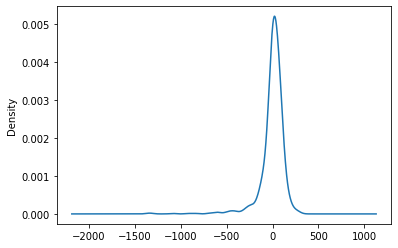

In [85]:
epsilon.plot(kind='density')

## Bonus : Analyse de l'homoscédasticité

L'analyse de l'homoscédasticité est primordiale : c'est en particulier elle qui nous permet de vérifier, à partir des résidus, si les bruits vérifient bien l'hypothèse $(\mathcal{H})$. On calcule donc les **résidus studentisés**.

$$t_i^*=\frac{\hat{\varepsilon}_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$
Avec $h_{ii}=\{X(X^\top X)^{-1} X^\top\}_{ii}=H_{ii}$ la matrice de projection sur l'hyperplan des variables. Plus précisément, $H$ est la matrice qui projette $Y$ sur l'espace engendré par les variables, soit $\hat{Y}=HY$. De même, on considère $\hat{\sigma}_{(i)}$ l'estimateur de la variance du bruit en supprimant l'observation $i$ (par une méthode de validation croisée Leave-One-Out que nous ne détaillerons pas ici).

Dans ce cas, on peut montrer que les résidus studentisés suivent une loi de Student à $n-p-1$ degrés de liberté.

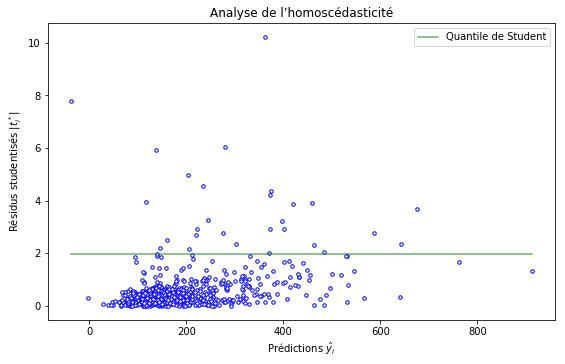

In [ ]:
#analyser le code ci-dessous 
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(y_train - Y_pred)
H = np.matmul(X_train, np.linalg.solve(np.dot(X_train.T, X_train), X_train.T))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()